In [168]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [169]:
#Defines Global Variables data entries
TOTAL_DATA = 150

# Splits data into training(80%) and testing(20%)
TRAINING_DATA = int(TOTAL_DATA*0.8) 
TESTING_DATA = int(TOTAL_DATA*0.2)

# Number of input features
FEATURE_NUMBER = 4

# Number of classes and respective indexing
CLASS_NUMBER = 3
CLASSNAMES = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [170]:
# Read in data
data = pd.read_csv('../DataSets/Iris.csv')

#Splits into 2 classes instead of 3
#data = data[0:100]

# Shuffle data
data = data.sample(frac = 1)

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
59,60,5.2,2.7,3.9,1.4,Iris-versicolor
128,129,6.4,2.8,5.6,2.1,Iris-virginica
17,18,5.1,3.5,1.4,0.3,Iris-setosa
139,140,6.9,3.1,5.4,2.1,Iris-virginica
49,50,5.0,3.3,1.4,0.2,Iris-setosa


In [171]:
# Pulling feature data and splicing it for training/testing using 80-20 ratio
x_train = data.iloc[:TRAINING_DATA, 1:FEATURE_NUMBER+1].values
x_test = data.iloc[TRAINING_DATA:, 1:FEATURE_NUMBER+1].values

# Standardizes the data by dividing the entries by standard deviation (i.e calculating how many standard deviations the entries are from the center)
x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
x_test = (x_test - np.mean(x_test, axis=0)) / np.std(x_test, axis=0)

# Reshape for matrix multiplication
x_train = x_train.reshape(FEATURE_NUMBER, TRAINING_DATA)
x_test = x_test.reshape(FEATURE_NUMBER, TESTING_DATA)



In [172]:
# Pulling label data and splicing it for training/testing using 80-20 ratio
y_train_data = data.iloc[:TRAINING_DATA, -1].values
y_test_data = data.iloc[TRAINING_DATA:, -1].values

# Create vectorized representations of each data point's class membership
y_train = np.zeros(shape=(CLASS_NUMBER, TRAINING_DATA))
y_test = np.zeros(shape=(CLASS_NUMBER, TESTING_DATA))

# Setting numeric labels for each data point's class
for row in range(CLASS_NUMBER):
    y_train[row, :TRAINING_DATA]  = [ele == CLASSNAMES[row] for ele in y_train_data]
    y_test[row, :TESTING_DATA] = [ele == CLASSNAMES[row] for ele in y_test_data]

In [173]:
# Randomly initialize weights and bias matricies
w = np.random.rand(CLASS_NUMBER, FEATURE_NUMBER)
b = np.random.rand(CLASS_NUMBER, 1)



In [174]:
#Class coresspondance function, returns a vector (z), which will be input into softmax function
#The highest number in z represents the correct class
def class_corr(weights, bias, x):
    
    numData = x.shape[1]
    #print(numData)
    z = weights.dot(x)
    #print(z)
    for input in range(numData):
        z[0:CLASS_NUMBER, input:input+1] += bias

    return z

z = class_corr(w, b, x_test)
print(z)



[[ 1.55239793  0.96203244  1.85484239  1.56272328 -1.46891664  1.11123492
  -2.01428101 -2.04481711 -0.21907261  0.0591456  -0.97064525 -1.18200055
   1.02188323  0.50066872  1.17623142  1.84877527 -2.49306751 -1.28832257
  -1.34517114 -1.84144273  1.71222451  0.97296193  1.3946021   1.84229409
   2.31203711  2.4597746   2.6211311   1.08714757  2.6250767   1.38317481]
 [ 1.57664133  0.71980666  1.6461098   1.22867281 -0.19706569  1.24170359
  -0.54318529 -0.48667126 -0.14370954  0.70595594 -0.46786132 -0.49144829
   1.37381361  1.15332373  1.43926326  2.08348895 -0.98104994 -0.56415705
  -0.02053482 -0.40118278  2.00624518  1.40958907  1.41146346  1.64991596
   2.4940995   2.45682857  2.49889896  1.4560263   2.13679394  1.31392276]
 [ 2.16296881  2.73373228  1.64023932  0.98888342 -0.09918621  1.51522126
  -1.35429641  0.12071124 -0.36639444 -0.6878088  -0.71155706 -1.00361934
   0.74816671  0.41486349  0.71963672  2.34028947 -1.55523427 -0.58447749
   0.23699144 -1.07827199  1.3989190

In [175]:
#Softmax Function
#expnentiates all elements of the z vector and divides by their sum to see class probability
def softmax(z):

    #creates empty probability array
    y_hat = np.empty([z.shape[0], z.shape[1]])
    numData = z.shape[1]

    #exponentiates the matrix
    z_exp = np.exp(z)

    #Converts z vector into probability distribution
    for input in range(numData):
        z_sum = np.sum(z_exp[0:CLASS_NUMBER, input:input+1])
        y_hat[0:CLASS_NUMBER, input:input+1] = z_exp[0:CLASS_NUMBER, input:input+1]/z_sum
    return y_hat


y_pred = softmax(z)
print(softmax(z))


[[0.25866381 0.13045089 0.38190184 0.43871662 0.11762299 0.27494087
  0.13719744 0.06911226 0.33998667 0.29557396 0.25322446 0.23865791
  0.31423248 0.26052479 0.34079618 0.25645389 0.1236046  0.19667542
  0.10388225 0.13574304 0.32543204 0.28359562 0.38317193 0.46831844
  0.38904366 0.41687367 0.43134946 0.29788514 0.52272869 0.42407421]
 [0.26501134 0.10238815 0.30995621 0.31412884 0.41961408 0.31325724
  0.5973581  0.32828363 0.36659932 0.56438092 0.41866045 0.47607884
  0.44677874 0.5003726  0.4433309  0.32429791 0.56065478 0.40574313
  0.39068216 0.57307905 0.4366685  0.43885825 0.38968751 0.38636031
  0.46673141 0.41564736 0.38171965 0.43077535 0.32078779 0.39570002]
 [0.47632485 0.76716096 0.30814195 0.24715454 0.46276294 0.41180189
  0.26544446 0.60260411 0.293414   0.14004512 0.3281151  0.28526325
  0.23898877 0.23910261 0.21587292 0.4192482  0.31574061 0.39758145
  0.50543559 0.29117791 0.23789946 0.27754613 0.22714056 0.14532125
  0.14422493 0.16747898 0.18693089 0.27133951 

In [176]:
#Loss function
#Returns the sum of all probabilities compared to the actual class
def cost(y, y_pred):

    total_loss = 0

    #Finds number of data samples
    numData = y.shape[1]

    #Manipulates y_pred into right form for the loss function
    y_pred = -1*np.log(y_pred)

    #iterates over all data samples
    for column in range(numData):

        #Computes total class loss for each data sample and sums them
        y_cur = y[0:CLASS_NUMBER, column:column+1].transpose()
        y_pred_cur = (y_pred[0:CLASS_NUMBER, column:column+1])
        total_loss += y_cur.dot(y_pred_cur)[0][0]

    #Divdes by number of data samples to find average error
    total_loss = total_loss/numData
    return total_loss
    
    

        



cost(y_test, y_pred)

1.2162926310000468

In [177]:
# Take the gradients of the loss with respect to weights and bias
def findGradients(x, y, y_pred):
    # Number of data samples
    numData = x.shape[1]

    # Calculate error for gradient computations
    error = y_pred - y
    error = error.transpose()
    

    # Dictionary for holding gradient values
    gradientDict = dict()
    gradientDict['gradWeights'] = np.array((1/numData) * x.dot(error))
    gradientDict['gradBias'] =  ((1/numData) * error.sum(axis=0)).reshape(1, CLASS_NUMBER)
    
    return gradientDict

y_pred = softmax(z)
findGradients(x_test, y_test, y_pred)

{'gradWeights': array([[ 0.14204137, -0.17214938,  0.03010801],
        [-0.04855074,  0.07820301, -0.02965228],
        [ 0.26726218, -0.08468202, -0.18258016],
        [ 0.04421095,  0.09238957, -0.13660051]]),
 'gradBias': array([[ 0.02034784,  0.10611975, -0.12646759]])}

In [178]:
# Repetitively perform gradient descent to improve model 
def gradientDescent(x, y, weights, bias, losses, max_iter, learning_rate, coeff_momentum):
    old_weights = np.zeros(shape=(FEATURE_NUMBER, CLASS_NUMBER))
    old_bias = np.zeros(shape=(1, CLASS_NUMBER))

    for i in range(max_iter): 
        z = class_corr(weights, bias, x)
        #print(z.shape)
        y_pred = softmax(z)
        gradients = findGradients(x, y, y_pred)

        momentum_weights = coeff_momentum * old_weights
        momentum_bias = coeff_momentum * old_bias

        # Compute gradient descent
        weights = weights - momentum_weights.transpose() - ((learning_rate * gradients["gradWeights"]).transpose())
        bias = bias - momentum_bias.transpose() - ((learning_rate * gradients["gradBias"].transpose()))
       
        old_weights = gradients["gradWeights"]
        old_bias = gradients["gradBias"]

        # Not required - meant to visualize model's performance
        loss = cost(y, y_pred)
        losses.append(loss)

        learning_rate *= 0.95

    return weights, bias


In [179]:
# List for storing log loss over time
losses = []

w, b = gradientDescent(x_train, y_train, w, b, losses, max_iter=50, learning_rate=0.1, coeff_momentum=0.75)

#print(w)
#print(b)

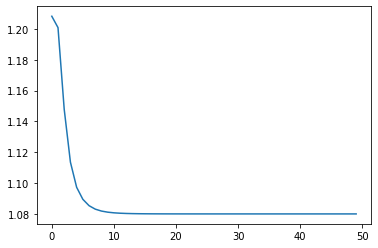

In [180]:
plt.plot(losses)

In [181]:
# Calculates accuracy of test data
def accuracy(y, y_pred):

    total_correct = 0
    confusion_matrix = np.zeros(shape=(CLASS_NUMBER, CLASS_NUMBER))

    numData = y.shape[1]
    
    # Iterating through all of data
    for data in range(numData):
        # Returns array for index of max probabilities for each data point 
        y_indexes = np.argmax(y, axis=0)
        y_pred_indexes = np.argmax(y_pred, axis=0)
        
        confusion_matrix[y_indexes[data]][y_pred_indexes[data]] += 1
        total_correct = np.sum(y_indexes == y_pred_indexes)
        
    total_accuracy = total_correct/numData
    return confusion_matrix, total_accuracy 


In [182]:
# Accuracy and confusion matrix check
z = class_corr(w, b, x_test)
y_pred = softmax(z)

confusion_matrix, model_acc = accuracy(y_test, y_pred)

print(confusion_matrix)
print(model_acc)


[[4. 3. 1.]
 [7. 2. 0.]
 [3. 9. 1.]]
0.23333333333333334


NameError: name 'pred_pos' is not defined